In [ ]:
## A Draft solver for Burger's Equation by Pejman Shoeibi Omrani ##
## pejman.shoeibiomrani@tno.nl##

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install tensorflow
!pip install deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 11.5 MB/s eta 0:00:00


In [5]:
import numpy as np
import deepxde as dde
from deepxde.backend import tf
import matplotlib.pyplot as plt
from keras.models import model_from_json # Only for network visualization
from tensorflow.keras.utils import plot_model # Only for network visualization

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


In [6]:
geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 0.99)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [7]:
def pde(x, y):
    dy_x = dde.grad.jacobian(y, x, i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t + y * dy_x - 0.01 / np.pi * dy_xx

In [8]:
bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial)

In [9]:
data = dde.data.TimePDE(geomtime, pde, [bc, ic],
                        num_domain=2540, num_boundary=80, num_initial=160)

In [10]:
net = dde.nn.FNN([2] + [20] * 3 + [1], "sigmoid", "Glorot uniform")

In [11]:
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)
losshistory, train_state = model.train(iterations=15000)

Compiling model...
Building feed-forward neural network...


/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.504308 s

'compile' took 1.491717 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.68e-05, 2.21e-01, 7.20e-01]    [3.68e-05, 2.21e-01, 7.20e-01]    []  
1000      [1.20e-02, 5.88e-02, 3.15e-01]    [1.20e-02, 5.88e-02, 3.15e-01]    []  
2000      [5.40e-02, 6.09e-03, 8.10e-02]    [5.40e-02, 6.09e-03, 8.10e-02]    []  
3000      [4.75e-02, 8.06e-04, 5.92e-02]    [4.75e-02, 8.06e-04, 5.92e-02]    []  
4000      [4.34e-02, 3.41e-04, 5.40e-02]    [4.34e-02, 3.41e-04, 5.40e-02]    []  
5000      [4.05e-02, 1.02e-04, 5.11e-02]    [4.05e-02, 1.02e-04, 5.11e-02]    []  
6000      [3.75e-02, 3.23e-05, 4.98e-02]    [3.75e-02, 3.23e-05, 4.98e-02]    []  
7000      [3.47e-02, 2.15e-05, 4.82e-02]    [3.47e-02, 2.15e-05, 4.82e-02]    []  
8000      [3.25e-02, 2.93e-05, 4.67e-02]    [3.25e-02, 2.93e-05, 4.67e-02]    []  
9000      [3.12e-02, 1.70e-05, 4.49e-02]    [3.12e-02, 1.70e-05, 4.49e-02]    []  
10000    

In [12]:
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

Compiling model...
'compile' took 0.332836 s

Training model...

Step      Train loss                        Test loss                         Test metric
15000     [1.03e-02, 1.49e-05, 8.04e-03]    [1.03e-02, 1.49e-05, 8.04e-03]    []  
16000     [7.42e-04, 1.88e-05, 3.58e-04]    [7.42e-04, 1.88e-05, 3.58e-04]        
17000     [3.55e-04, 2.09e-06, 1.15e-04]    [3.55e-04, 2.09e-06, 1.15e-04]        
18000     [1.92e-04, 6.91e-07, 6.63e-05]    [1.92e-04, 6.91e-07, 6.63e-05]        
19000     [1.15e-04, 5.43e-07, 3.44e-05]    [1.15e-04, 5.43e-07, 3.44e-05]        
20000     [8.16e-05, 4.07e-07, 2.40e-05]    [8.16e-05, 4.07e-07, 2.40e-05]        
21000     [5.70e-05, 5.24e-07, 1.68e-05]    [5.70e-05, 5.24e-07, 1.68e-05]        
22000     [4.23e-05, 7.94e-07, 7.85e-06]    [4.23e-05, 7.94e-07, 7.85e-06]        
23000     [3.04e-05, 5.11e-07, 4.79e-06]    [3.04e-05, 5.11e-07, 4.79e-06]        
24000     [2.17e-05, 2.76e-07, 3.79e-06]    [2.17e-05, 2.76e-07, 3.79e-06]        
24581     [1.96

In [ ]:
# !pip install scipy

In [ ]:
# #get data from matlab workspace
# import scipy

# data = scipy.io.loadmat("/content/drive/My Drive/3 - 5A/PROJET INGENIEUR/Documents reçus/burgers_data.mat") #load the simulation data from matlab

# t = data['t'].flatten()[:,None] # time from simulation
# x = data['x'].flatten()[:,None] # x from simulation
# exact_u = data['usol'] #Calculated speed from simulation, function of x and time

In [ ]:
#ploting results

# color = ['g', 'y', 'c', 'b', 'm', 'r', 'k']
# line = ['-', '--', '-.']
# line_idx = 0

# T = [0,24,50,90]

# plt.figure(figsize=(20,12))
# color_idx = 0
# for idx_time in T:
#     # x_t = [[0,0]]
#     # x_t = np.append(x_t, np.insert(x,1,t[idx_time][0], axis = 1), axis = 0)
#     x_t = x_t[1:]
#     plt.plot(x_t[:,0], model.predict(x_t).flatten(), color[color_idx%7], linestyle = line[line_idx], label = "at t= " + str(t[idx_time]))
#     color_idx +=1
# line_idx +=1

# color_idx = 0
# for idx_time in T:
#   plt.plot(x, exact_u[:,idx_time], color[color_idx%7], linestyle = ':', label = 'u expected at t= ' + str(t[idx_time]))
#   color_idx+=1

# plt.ylabel("u (m/s)")
# plt.xlabel('position x (m)')
# plt.legend()

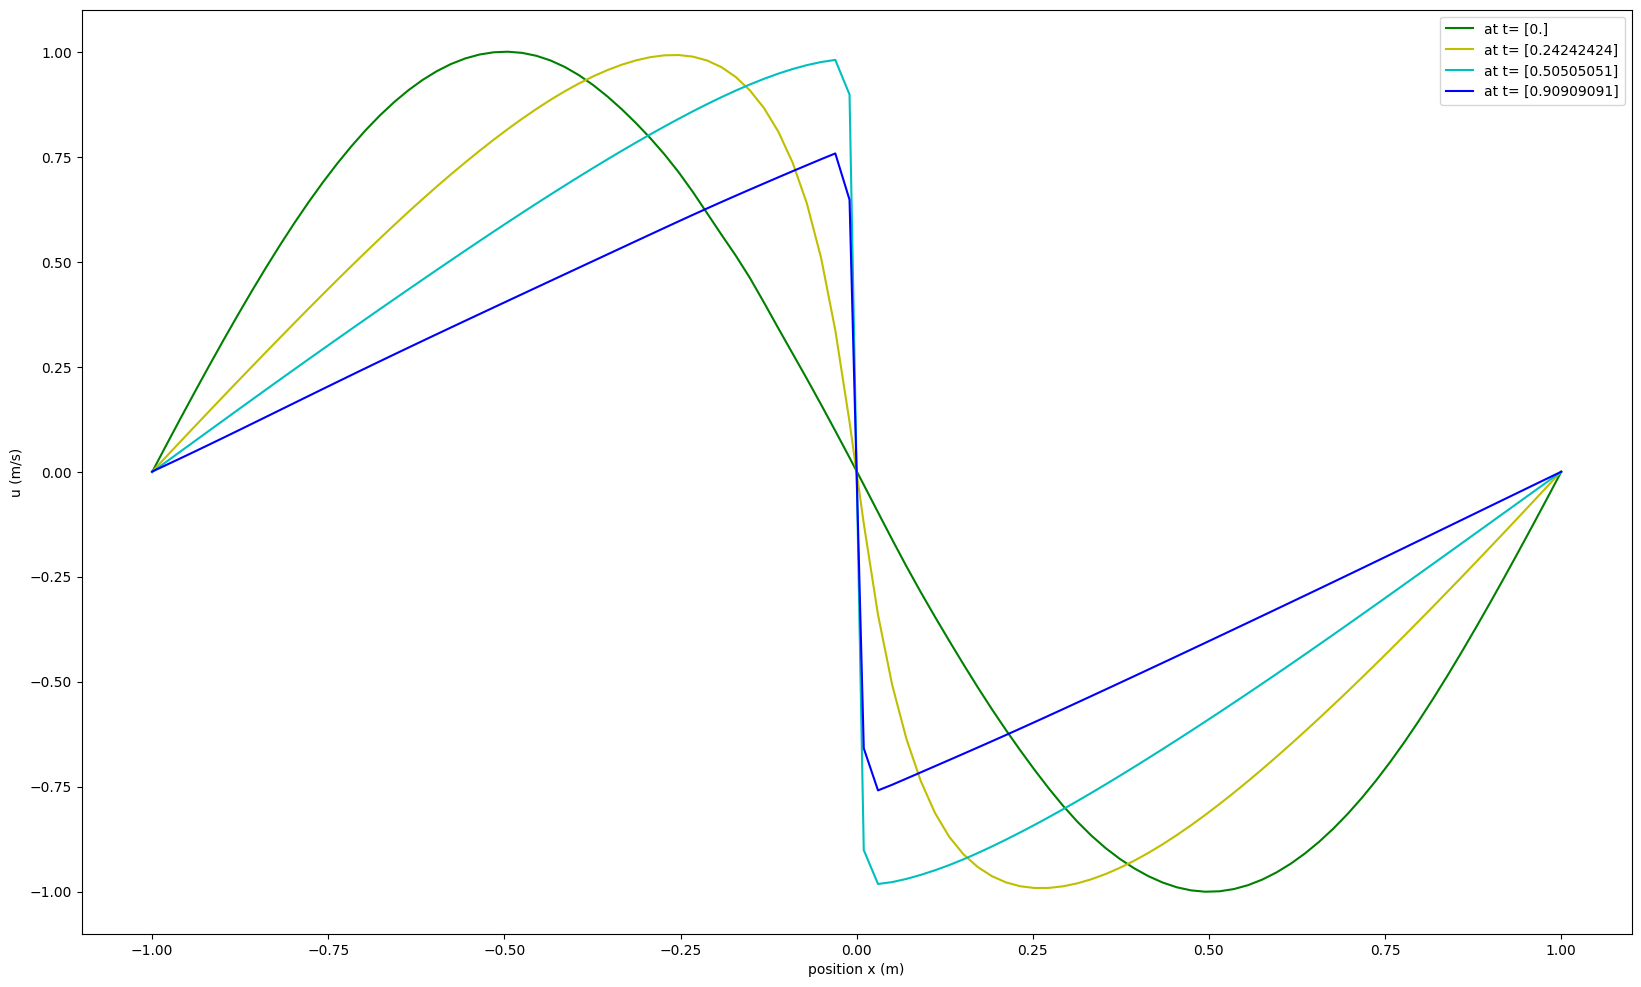

In [13]:
x = np.linspace(-1, 1, num = 100)
x = np.reshape(x, (-1, 1))
t = np.linspace(0, 1, num = 100)
t = np.reshape(t, (-1, 1))

color = ['g', 'y', 'c', 'b', 'm', 'r', 'k']
line = ['-', '--', '-.']
line_idx = 0

T = [0, 24, 50, 90]

plt.figure(figsize=(20,12))
color_idx = 0
for idx_time in T:
  x_t = [[0,0]]
  x_t = np.append(x_t, np.insert(x, 1, t[idx_time][0], axis=1), axis=0)
  x_t = x_t[1:]

  plt.plot(
      x_t[:,0],
      model.predict(x_t).flatten(),
      color[color_idx % 7],
      linestyle = line[line_idx],
      label = "at t= " + str(t[idx_time])
  )
  color_idx +=1
line_idx +=1

color_idx = 0

plt.ylabel("u (m/s)")
plt.xlabel('position x (m)')
plt.legend()

In [ ]:
idx_time

# Another code

In [ ]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch"""
import deepxde as dde


def gen_testdata():
    data = np.load("../dataset/Burgers.npz")
    t, x, exact = data["t"], data["x"], data["usol"].T
    xx, tt = np.meshgrid(x, t)
    X = np.vstack((np.ravel(xx), np.ravel(tt))).T
    y = exact.flatten()[:, None]
    return X, y


def pde(x, y):
    dy_x = dde.grad.jacobian(y, x, i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t + y * dy_x - 0.01 / np.pi * dy_xx


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 0.99)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(
    geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial
)

data = dde.data.TimePDE(
    geomtime, pde, [bc, ic], num_domain=2540, num_boundary=80, num_initial=160
)
net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)

model.compile("adam", lr=1e-3)
model.train(iterations=15000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

X, y_true = gen_testdata()
y_pred = model.predict(X)
f = model.predict(X, operator=pde)
print("Mean residual:", np.mean(np.absolute(f)))
print("L2 relative error:", dde.metrics.l2_relative_error(y_true, y_pred))
np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))